In [5]:
#data : https://www.kaggle.com/datasets/atefehmirnaseri/cell-phone-price/data

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
import os
os.getcwd()

'D:\\Bellevue University MSDS\\DSC_680_Final_Project\\DSC680-Applied-Data-Science\\Project3-CellPhone_Price_Prediction'

battery_power : Total energy of the battery can be stored(mAh)
blue : the device has blutooth or not, yes/no (1/0)
clock_speed : the speed of execution of instructions by microprocessor
dual_sim : the device has two SIM card at the same time or not
fc : the quality of front camera in MegaPixel
four_g : the device has 4G network or not
int_memory : internal memory in GigaByte
m_dep : the device depth in CM
mobile_wt : the weight of device
n_cores : the number of processor cores
pc : the quality of primary camera in MegePixel
px_height : the height of pixel resolution
px_width : the width of pixel resolution
ram : random access memory in MegaByte
sc_h : the height of device screen in CM
sc_w : the width of device screen in CM
talk_time : the maximum talk time that the full charge battery of the device can support
three_g : the device has 3G network or not
touch_screen : the device has touch screen or not
wifi : the device has wifi or not
price_range : the categorized price of the device

In [49]:
train_data = pd.read_csv("D:\\Bellevue University MSDS\\DSC_680_Final_Project\\DSC680-Applied-Data-Science\\Project3-CellPhone_Price_Prediction\\CellPhone_train.csv")
test_data = pd.read_csv("D:\\Bellevue University MSDS\\DSC_680_Final_Project\\DSC680-Applied-Data-Science\\Project3-CellPhone_Price_Prediction\\CellPhone_test.csv")

In [50]:
print(train_data.shape, test_data.shape)

(2000, 21) (1000, 21)


In [51]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [101]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  2000 non-null   int64   
 1   blue           2000 non-null   category
 2   clock_speed    2000 non-null   float64 
 3   dual_sim       2000 non-null   category
 4   fc             2000 non-null   int64   
 5   four_g         2000 non-null   category
 6   int_memory     2000 non-null   int64   
 7   m_dep          2000 non-null   float64 
 8   mobile_wt      2000 non-null   int64   
 9   n_cores        2000 non-null   category
 10  pc             2000 non-null   int64   
 11  px_height      2000 non-null   int64   
 12  px_width       2000 non-null   int64   
 13  ram            2000 non-null   int64   
 14  sc_h           2000 non-null   int64   
 15  sc_w           2000 non-null   int64   
 16  talk_time      2000 non-null   int64   
 17  three_g        2000 non-null   ca

In [102]:
#check for missing values
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [103]:
price_level = {0: "Low Cost", 1: "Medium Cost", 2:"High Cost", 3:"Very High Cost"}

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


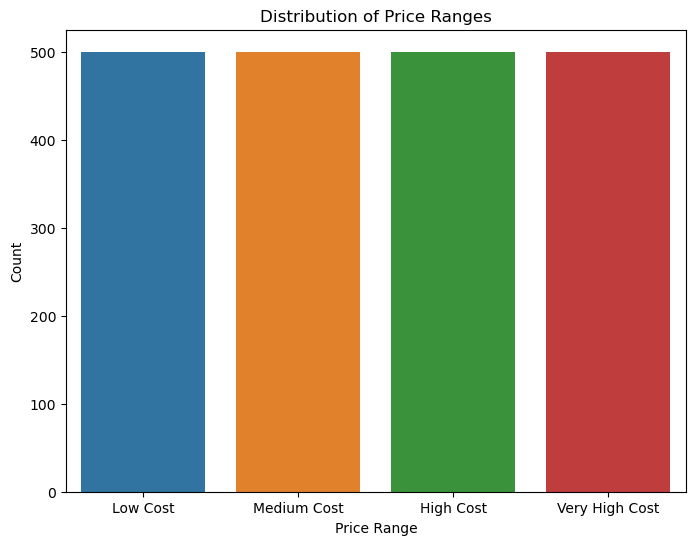

In [104]:
plt.figure(figsize=(8, 6))
sns.countplot(x='price_range', data=train_data.replace({"price_range": price_level}))
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

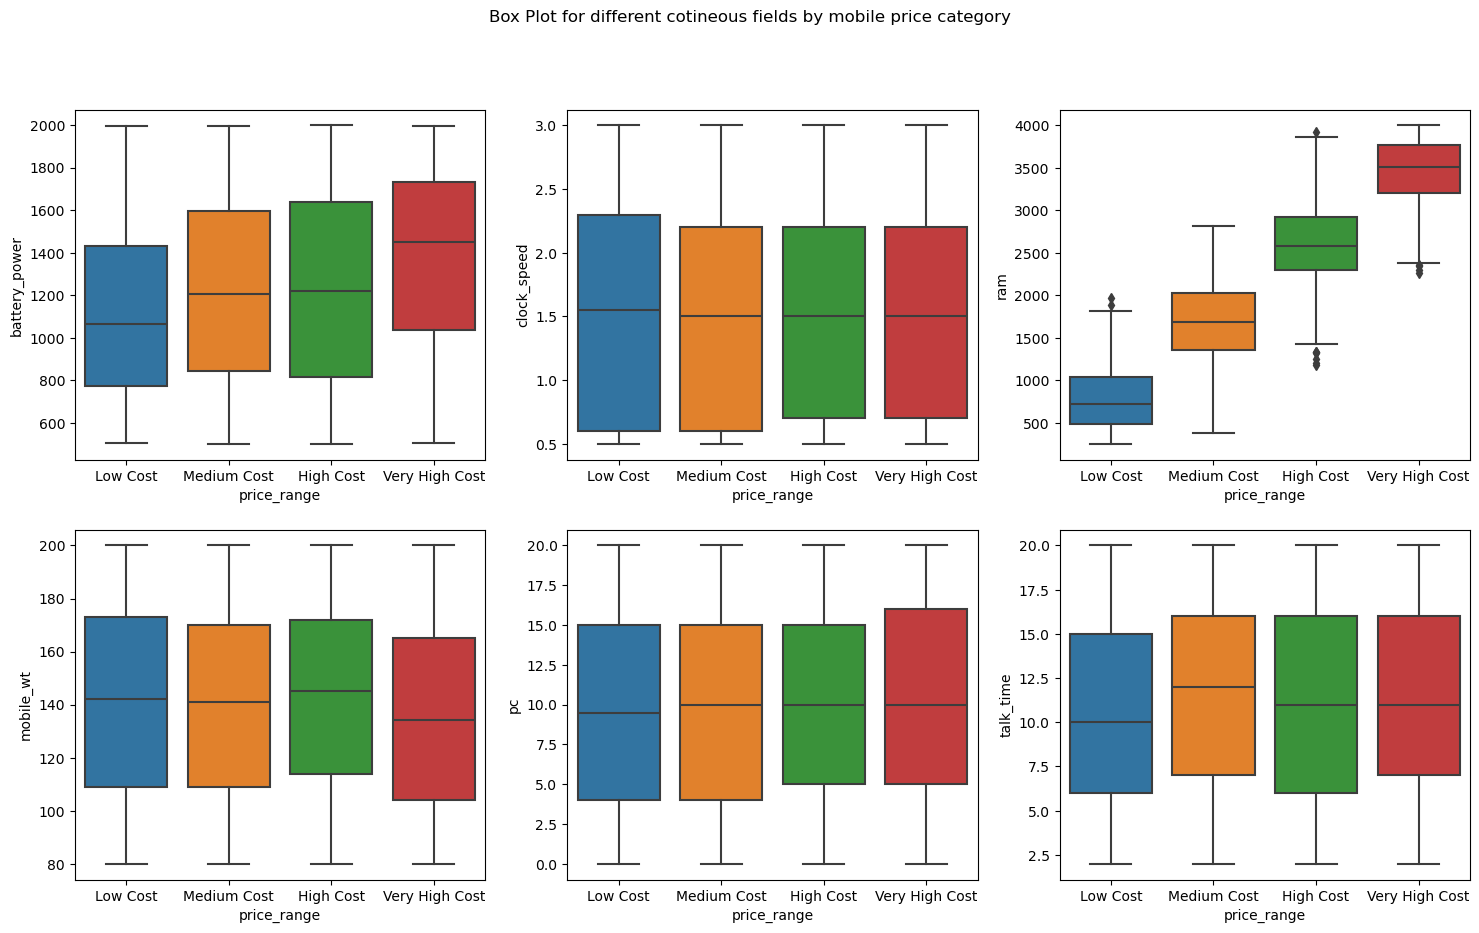

In [105]:

%matplotlib inline
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
 
fig.suptitle('Box Plot for different cotineous fields by mobile price category')
 
sns.boxplot(ax=axes[0, 0], x="price_range", y="battery_power",  data=train_data.replace({"price_range": price_level}))
sns.boxplot(ax=axes[0, 1], x="price_range", y="clock_speed",  data=train_data.replace({"price_range": price_level}))
sns.boxplot(ax=axes[0, 2], x="price_range", y="ram", data=train_data.replace({"price_range": price_level}))
sns.boxplot(ax=axes[1, 0], x="price_range", y="mobile_wt", data=train_data.replace({"price_range": price_level}))
sns.boxplot(ax=axes[1, 1], x="price_range", y="pc", data=train_data.replace({"price_range": price_level}))
sns.boxplot(ax=axes[1, 2], x="price_range", y="talk_time", data=train_data.replace({"price_range": price_level}))

plt.show()

#### 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

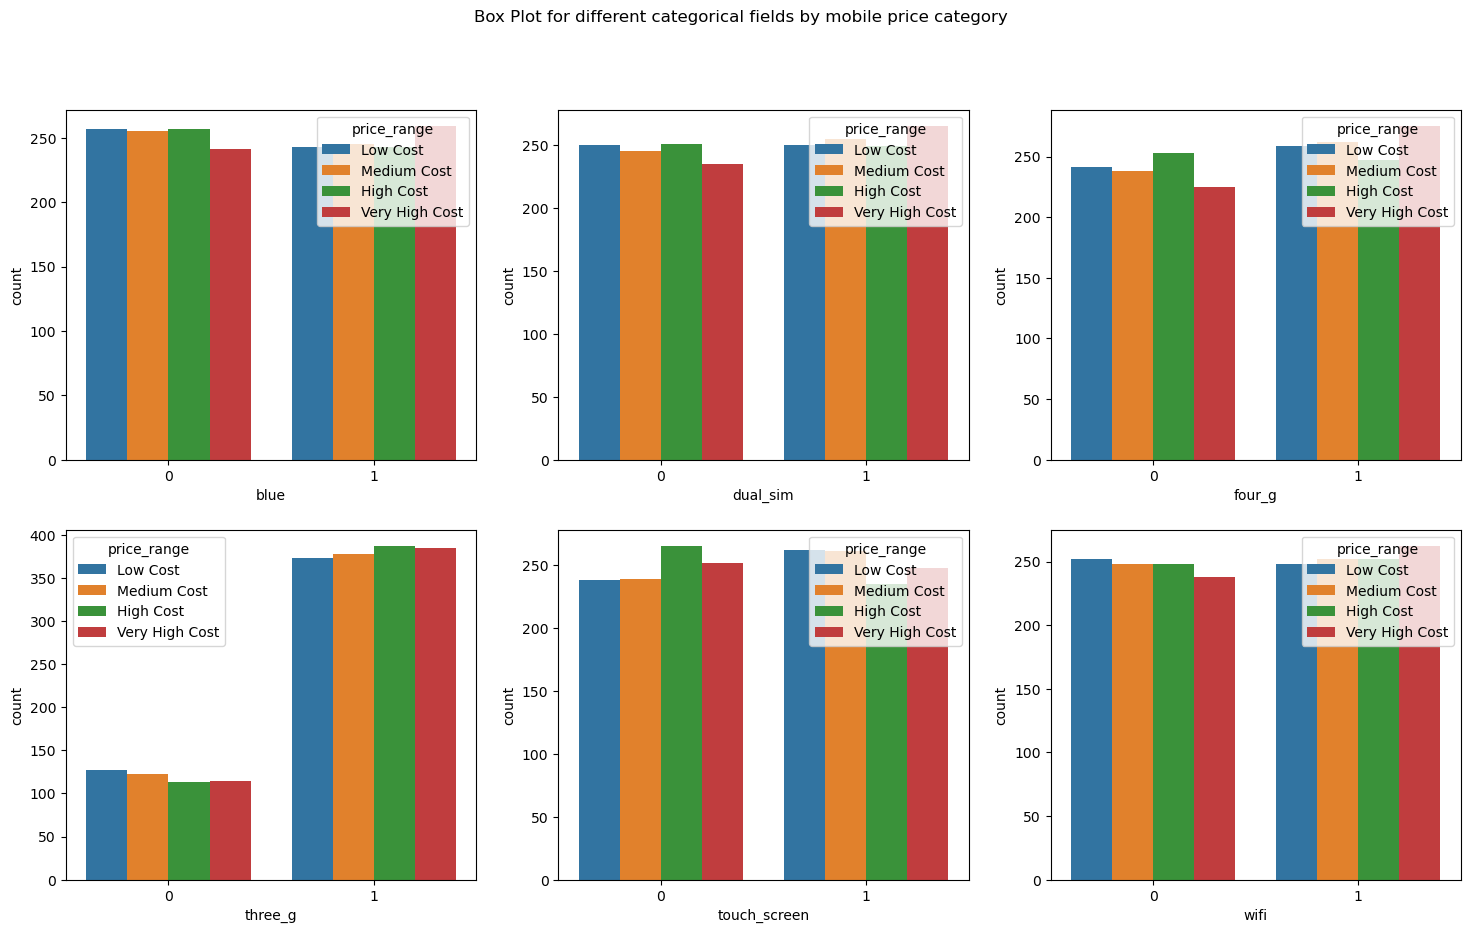

In [106]:

%matplotlib inline
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
 
fig.suptitle('Box Plot for different categorical fields by mobile price category')
 
sns.countplot(ax=axes[0, 0],  x="blue",  data=train_data.replace({"price_range": price_level}), hue='price_range')
sns.countplot(ax=axes[0, 1],  x="dual_sim",  data=train_data.replace({"price_range": price_level}), hue='price_range')
sns.countplot(ax=axes[0, 2],  x="four_g", data=train_data.replace({"price_range": price_level}), hue='price_range')
sns.countplot(ax=axes[1, 0],  x="three_g",  data=train_data.replace({"price_range": price_level}), hue='price_range')
sns.countplot(ax=axes[1, 1],  x="touch_screen",  data=train_data.replace({"price_range": price_level}), hue='price_range')
sns.countplot(ax=axes[1, 2],  x="wifi",  data=train_data.replace({"price_range": price_level}), hue='price_range')

plt.show()

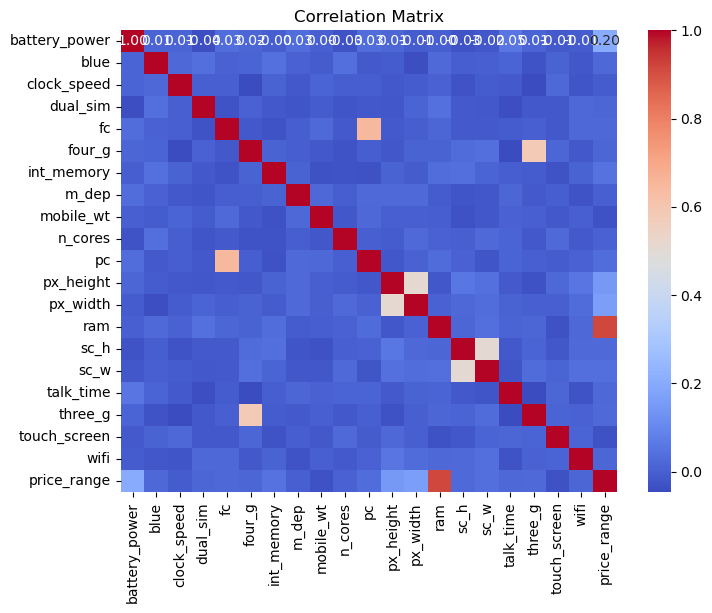

In [107]:
plt.figure(figsize=(8, 6))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Model Fitting

In [108]:
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [112]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8925
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



In [113]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)




DecisionTreeClassifier()

In [114]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.835
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       105
           1       0.74      0.86      0.79        91
           2       0.79      0.72      0.75        92
           3       0.88      0.89      0.89       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.83      0.84       400

